# ML Practical 3

## Soham Pathak B212029

## Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.
Dataset Description: The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling Perform following steps:
1.	Read the dataset.
2.	Distinguish the feature and target set and divide the data set into training and test sets.
3.	Normalize the train and test data.
4.	Initialize and build the model. Identify the points of improvement and implement the same.
5.	Print the accuracy score and confusion matrix.

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("Churn_Modelling.csv")

## Preprocessing

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [5]:
df.shape

(10000, 14)

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
 11  Male             10000 non-null  uint8  
 12  Germany          10000 non-null  uint8  
 13  Spain            10000 non-null  uint8  
dtypes: float64(2), int64(7), object(2), uint8(3)
memory usage: 888.8+ KB


In [11]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
#Eliminating not required columns
df = df.drop(['RowNumber','Surname', 'CustomerId'], axis=1)

In [13]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Visualization

In [14]:
def visualization(x, y, xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("No. of customers", fontsize=20)
    plt.legend()

In [15]:
df_churn_exited = df[df['Exited']==1]['Tenure']
df_churn_not_exited = df[df['Exited']==0]['Tenure']

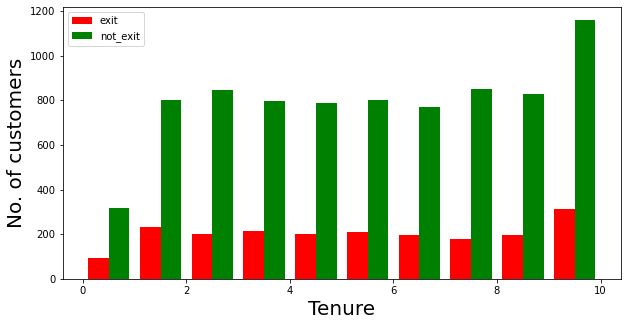

In [16]:
visualization(df_churn_exited, df_churn_not_exited, "Tenure")

In [17]:
df_churn_exited2 = df[df['Exited']==1]['Age']
df_churn_not_exited2 = df[df['Exited']==0]['Age']

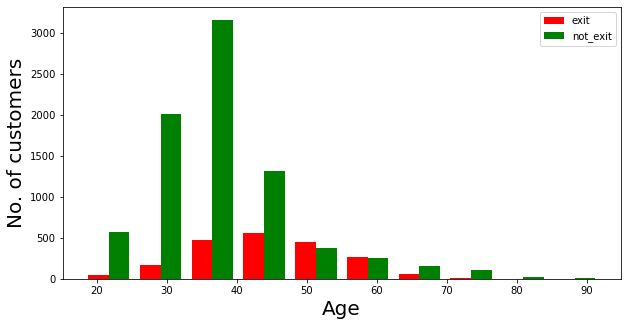

In [18]:
visualization(df_churn_exited2, df_churn_not_exited2, "Age")

## Converting the Categorical Variables

In [19]:
X = df[['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
states = pd.get_dummies(df['Geography'],drop_first = True)
gender = pd.get_dummies(df['Gender'],drop_first = True)

In [20]:
states

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [21]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [22]:
df = pd.concat([df,gender,states], axis = 1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,1,0


## Splitting the training and testing Dataset

In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [24]:
X = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Male','Germany','Spain']]

In [25]:
y = df['Exited']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

## Normalizing the values with mean as 0 and Standard Deviation as 1

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [28]:
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
X_train

array([[ 1.21600607, -1.32666453,  1.72558294, ..., -1.08503177,
        -0.57976965, -0.57691038],
       [-2.41842018, -0.65148212, -1.745916  , ...,  0.921632  ,
        -0.57976965, -0.57691038],
       [-0.29748022, -1.03730064, -1.39876611, ..., -1.08503177,
         1.72482295, -0.57691038],
       ...,
       [-0.51369254, -0.94084601,  1.37843304, ...,  0.921632  ,
        -0.57976965, -0.57691038],
       [ 0.80417307, -0.94084601, -0.01016653, ...,  0.921632  ,
         1.72482295, -0.57691038],
       [ 0.27908599,  0.21660954,  1.37843304, ..., -1.08503177,
        -0.57976965, -0.57691038]])

In [30]:
X_test

array([[-0.95641302,  0.60242806, -1.39876611, ..., -1.08503177,
        -0.57976965, -0.57691038],
       [ 0.24819851,  0.12015491,  1.03128315, ..., -1.08503177,
        -0.57976965,  1.73337147],
       [ 0.80417307, -1.03730064, -1.745916  , ..., -1.08503177,
        -0.57976965,  1.73337147],
       ...,
       [ 1.56606412,  2.53152064, -1.05161621, ..., -1.08503177,
        -0.57976965, -0.57691038],
       [ 0.27908599, -1.03730064, -1.05161621, ...,  0.921632  ,
        -0.57976965, -0.57691038],
       [ 0.12464861, -0.65148212, -0.70446632, ...,  0.921632  ,
         1.72482295, -0.57691038]])

## Building the Classifier Model using Keras 

In [31]:
#Keras is the wrapper on the top of tenserflow
#Can use Tenserflow as well but won't be able to understand the errors initially. 

import keras 

In [32]:
#To create sequential neural network
from keras.models import Sequential 

#To create hidden layers
from keras.layers import Dense 

In [33]:
classifier = Sequential()

In [34]:
#To add the layers
#Dense helps to contruct the neurons
#Input Dimension means we have 11 features 
#Units is to create the hidden layers
#Uniform helps to distribute the weight uniformly
classifier.add(Dense(activation = "relu",input_dim = 11,units = 6,kernel_initializer = "uniform")) 

In [35]:
classifier.add(Dense(activation = "relu",units = 6,kernel_initializer = "uniform"))   #Adding second hidden layers

In [36]:
classifier.add(Dense(activation = "sigmoid",units = 1,kernel_initializer = "uniform")) #Final neuron will be having sigmoid function

In [37]:
classifier.compile(optimizer="adam",loss = 'binary_crossentropy',metrics = ['accuracy'])
#To compile the Artificial Neural Network. Ussed Binary crossentropy as we just have only two output

In [38]:
#3 layers created. 6 neurons in 1st,6neurons in 2nd layer and 1 neuron in last
classifier.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
#Fitting the ANN to training dataset
classifier.fit(X_train,y_train,batch_size=10,epochs=50) 

Epoch 1/50
700/700 [==============================] - 1s 937us/step - loss: 0.4960 - accuracy: 0.7999
Epoch 2/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4271 - accuracy: 0.8004
Epoch 3/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4225 - accuracy: 0.8004
Epoch 4/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4181 - accuracy: 0.8027
Epoch 5/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4150 - accuracy: 0.8253
Epoch 6/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4125 - accuracy: 0.8329
Epoch 7/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4108 - accuracy: 0.8327
Epoch 8/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4097 - accuracy: 0.8337
Epoch 9/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4084 - accuracy: 0.8353
Epoch 10/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4079 - accuracy: 0.83

In [40]:
#Predicting the result
y_pred =classifier.predict(X_test)
y_pred = (y_pred > 0.5)

94/94 [==============================] - 0s 1ms/step


In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [42]:
cm = confusion_matrix(y_test,y_pred)

In [43]:
#Confusion Matrix
cm

array([[2293,   67],
       [ 454,  186]], dtype=int64)

In [44]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8263333333333334

Text(69.0, 0.5, 'Truth')

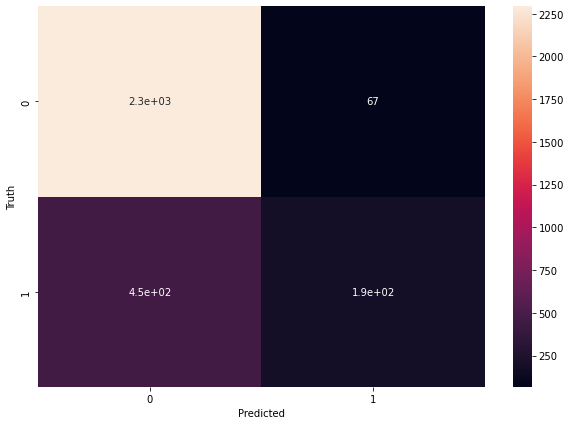

In [45]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [46]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      2360
           1       0.74      0.29      0.42       640

    accuracy                           0.83      3000
   macro avg       0.78      0.63      0.66      3000
weighted avg       0.81      0.83      0.80      3000

